# Why are flights cancelled?



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar as cd
import matplotlib.dates as mdates

%matplotlib inline



My interest in exploring these dataset is to find out what are the characteristic of the cancelled flights. I would also like to check if it is changing over a years but I will start with couple of dataset as a sample and then will arrange a dataset from all the avaliable sets in the period from 1989 to 2008. 

In [2]:
#load datasets
sample_1 = pd.read_csv('1990.csv') 
sample_2 = pd.read_csv('2008.csv') 
df_can = pd.read_csv('cancelled.csv', low_memory=False)
df_amount = pd.read_csv('amount.csv')
df_carrier = pd.read_csv('amount_carrier.csv')
df_origin = pd.read_csv('amount_origin.csv')

In [3]:
cancel_1 = sample_1.query('Cancelled == 1')
cancel_2 = sample_2.query('Cancelled == 1')

In [4]:
# now we will drop columns whihc do not provide useful information for cancelled flights
column_list = ['DepTime', 'ArrTime', 'TailNum', 'AirTime', 'ArrDelay', 'DepDelay', 'ActualElapsedTime', 'TaxiIn', 'TaxiOut', 'WeatherDelay', 'CarrierDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Cancelled', 'Diverted' ]


In [5]:
cancel_1 = cancel_1.drop(columns = column_list)
cancel_2 = cancel_2.drop(columns = column_list)

In [6]:
#checking how the carriers and airports dataset look like
carriers = pd.read_csv('carriers.csv')
airports = pd.read_csv('airports.csv')

In [7]:
country_list = list(airports.country.unique())
country_list

['USA',
 'Thailand',
 'Palau',
 'N Mariana Islands',
 'Federated States of Micronesia']

In [8]:
country_list.remove('USA')
country_list

['Thailand', 'Palau', 'N Mariana Islands', 'Federated States of Micronesia']

In [9]:
non_US = []
for name in country_list:
    non_US.append(airports.groupby('country').get_group(name).iata.values[0])

In [10]:
list(non_US)

['ROP', 'ROR', 'SPN', 'YAP']

In [11]:
#dropping airport outside US
for name in non_US:
    cancel_1 = cancel_1.drop(cancel_1[cancel_1['Origin'] == name].index)
    cancel_2 = cancel_2.drop(cancel_2[cancel_2['Origin'] == name].index)
    cancel_1 = cancel_1.drop(cancel_1[cancel_1['Dest'] == name].index)
    cancel_2 = cancel_2.drop(cancel_2[cancel_2['Dest'] == name].index)
    df_can = df_can.drop(df_can[df_can['Origin'] == name].index)
    df_can = df_can.drop(df_can[df_can['Dest'] == name].index)

#### Percentage of cancelled fligths is growing

In [15]:
base_color_1 = 'royalblue'
base_color_2 = 'darkorange'


In [16]:
#I add couple of columns to simplify plotting
df_amount['cancelled'] = np.array(df_can.Year.value_counts(sort = False))
df_amount['cancelled %'] = np.array(df_can.Year.value_counts(sort = False))/np.array(df_amount.amount) *100

In [17]:
x = df_amount.year
y = df_amount['cancelled %']
mean = df_amount['cancelled %'].mean()

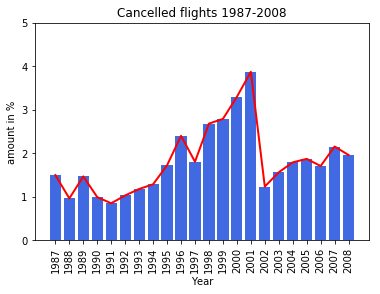

In [18]:
fig, ax = plt.subplots()


#ax.hlines(mean, xmin=1987, xmax=2009, linewidth=2, color='g')
plt.bar(df_amount.year, df_amount['cancelled %'], color = base_color_1)
plt.plot(x, y, linewidth=2, color='r')

ticks = np.arange(1987, 2009, 1)
plt.ylim([0, 5]);
plt.ylabel('amount in %')
plt.xlabel('Year')
plt.xticks(ticks, rotation = 90);
plt.title('Cancelled flights 1987-2008');

### worry your flight will be cancelled?

### worry no more, make a data driven decision!

### why are flights cancelled?

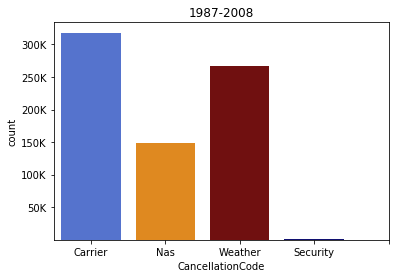

In [19]:
color_1 = [  "royalblue", "darkorange", "maroon", "navy"]
code = ['Carrier', 'Nas', 'Weather', 'Security']
xticks_loc = np.arange(0, 5, 1)
yticks_loc = np.arange(50000, df_can.CancellationCode.value_counts().max(), 50000)
numbers = ['50K', '100K', '150K', '200K', '250K', '300K', '350K']
sb.countplot(data = df_can, x = 'CancellationCode', palette =  color_1);
plt.xticks(xticks_loc, code);
plt.yticks(yticks_loc, numbers)
plt.title('1987-2008');


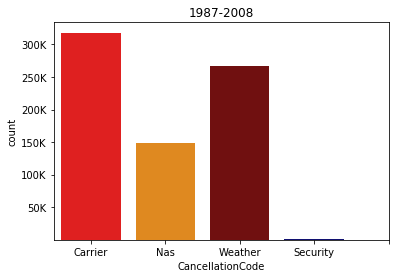

In [20]:
color_2 = ["r", "darkorange", "maroon","navy"]
code = ['Carrier', 'Nas', 'Weather', 'Security']
xticks_loc = np.arange(0, 5, 1)
yticks_loc = np.arange(50000, df_can.CancellationCode.value_counts().max(), 50000)
numbers = ['50K', '100K', '150K', '200K', '250K', '300K', '350K']
sb.countplot(data = df_can, x = 'CancellationCode', palette= color_2)
plt.xticks(xticks_loc, code);
plt.yticks(yticks_loc, numbers)
plt.title('1987-2008');


### Carrier delay is within the control of the air carrier. 

#### Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment etc.


crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.

In [21]:
list_1 = list(cancel_1.UniqueCarrier.unique())
list_2 = list(cancel_2.UniqueCarrier.unique())

match_cr = list(set(list_1)&set(list_2)) #make a list of carriers which present in both years

In [22]:
#leaving those carriers in both datasets for cancelled and total ampunt of flights
cancel_1a = cancel_1[cancel_1['UniqueCarrier'].isin(match_cr)]
cancel_2a = cancel_2[cancel_2['UniqueCarrier'].isin(match_cr)]
sample_1a = sample_1[sample_1['UniqueCarrier'].isin(match_cr)]
sample_2a = sample_2[sample_2['UniqueCarrier'].isin(match_cr)]

In [23]:
cancel_1_per = cancel_1a.UniqueCarrier.value_counts()/sample_1a.UniqueCarrier.value_counts()*100
cancel_2_per = cancel_2a.UniqueCarrier.value_counts()/sample_2a.UniqueCarrier.value_counts()*100


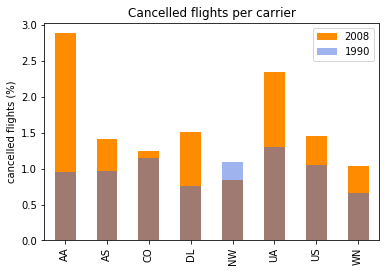

In [24]:
cancel_2_per.plot(kind = 'bar', color = base_color_2);
cancel_1_per.plot(kind = 'bar', color = base_color_1, alpha = 1/2);

plt.ylabel('cancelled flights (%)')
plt.title('Cancelled flights per carrier')

plt.legend(['2008', '1990'])
plt.show()

In [25]:
#get additional information - total amount of flights per carrier for 1987-2008
car_list_1 = list(df_carrier.carrier.unique())
car_list_2 = list(df_can.UniqueCarrier.unique())
match = list(set(car_list_1)&set(car_list_2))

amount_flights = []
for carrier in car_list_1:
    amount_flights.append(df_carrier.query('carrier == @carrier').amount.sum())
    
new_df = pd.DataFrame({'carrier': car_list_1, 'total_flights':amount_flights})    

In [26]:
new_df_car = new_df[new_df['carrier'].isin(match)]


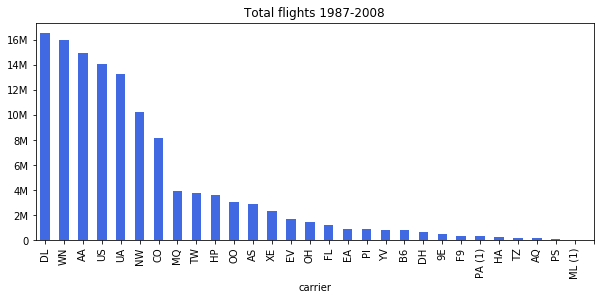

In [27]:
fig, ax = plt.subplots(figsize = [10,4]);
yticks_loc = np.arange(0, new_df_car.total_flights.max(), 2000000)
numbers = ['0', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M']
order = list(new_df_car.sort_values("total_flights", ascending = False).carrier)
xticks_loc = np.arange(0, len(match)+0.5, 1)
new_df_car.total_flights.sort_values(ascending = False).plot(kind = 'bar', color = base_color_1);
plt.yticks(yticks_loc, numbers)
plt.xticks(xticks_loc, order)
plt.xlabel('carrier')
plt.title('Total flights 1987-2008');

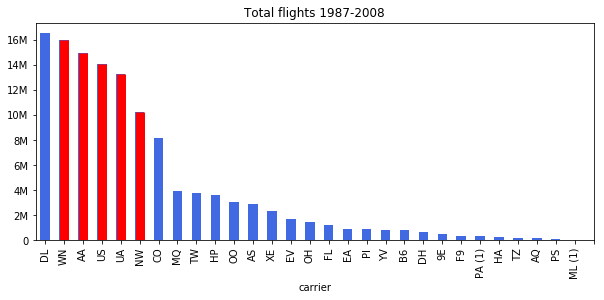

In [28]:
fig, ax = plt.subplots(figsize = [10,4]);
yticks_loc = np.arange(0, new_df_car.total_flights.max(), 2000000)
numbers = ['0', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M']
order = list(new_df_car.sort_values("total_flights", ascending = False).carrier)
xticks_loc = np.arange(0, len(match)+0.5, 1)
new_df_car.total_flights.sort_values(ascending = False).plot(kind = 'bar', color = base_color_1);
ax.vlines(1, ymin = 0, ymax =new_df_car.total_flights.sort_values(ascending = False)[3],  linewidth=9, color='r')
ax.vlines(2, ymin = 0, ymax =new_df_car.total_flights.sort_values(ascending = False)[11],  linewidth=9, color='r')
ax.vlines(3, ymin = 0, ymax =new_df_car.total_flights.sort_values(ascending = False)[12],  linewidth=9, color='r')
ax.vlines(4, ymin = 0, ymax =new_df_car.total_flights.sort_values(ascending = False)[2],  linewidth=9, color='r')
ax.vlines(5, ymin = 0, ymax =new_df_car.total_flights.sort_values(ascending = False)[6],  linewidth=9, color='r')
plt.xticks(xticks_loc, order)
plt.yticks(yticks_loc, numbers)
#plt.ylabel('%')
plt.xlabel('carrier')
plt.title('Total flights 1987-2008');

In [29]:
new_index = list(new_df_car.carrier)
num = df_can.UniqueCarrier.value_counts()
num = num.reindex(index = new_index) 
new_df_car['percent'] = np.array(num)/new_df_car.total_flights*100

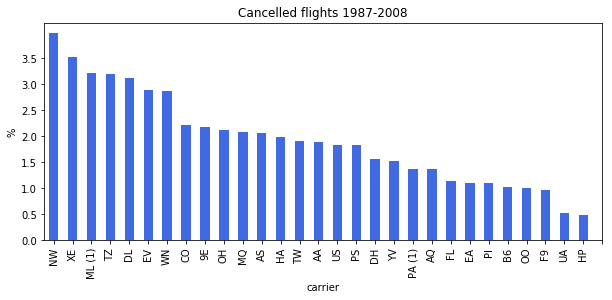

In [30]:
yticks_loc = np.arange(0, new_df_car.percent.max(), 0.5)
xticks_loc = np.arange(0, len(match)+0.5, 1)
fig, ax = plt.subplots(figsize = [10,4]);
new_df_car.percent.sort_values(ascending = False).plot(kind = 'bar', color = base_color_1);
plt.xticks(xticks_loc, match)
plt.yticks(yticks_loc)
plt.ylabel('%')
plt.xlabel('carrier')
plt.title('Cancelled flights 1987-2008');

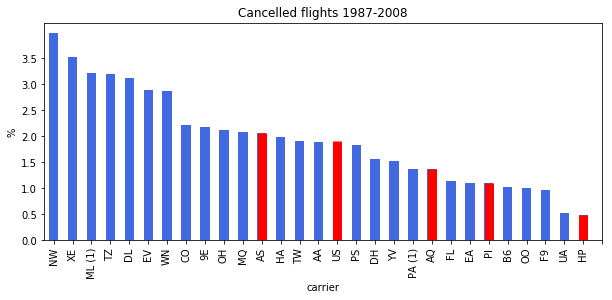

In [31]:
yticks_loc = np.arange(0, new_df_car.percent.max(), 0.5)
xticks_loc = np.arange(0, len(match)+0.5, 1)
fig, ax = plt.subplots(figsize = [10,4]);
new_df_car.percent.sort_values(ascending = False).plot(kind = 'bar', color = base_color_1);
ax.vlines(11, ymin = 0, ymax =new_df_car.percent.sort_values(ascending = False)[12],  linewidth=9, color='r')
ax.vlines(20, ymin = 0, ymax =new_df_car.percent.sort_values(ascending = False)[0],  linewidth=9, color='r')
ax.vlines(28, ymin = 0, ymax =new_df_car.percent.sort_values(ascending = False)[24],  linewidth=9, color='r')
ax.vlines(15, ymin = 0, ymax =new_df_car.percent.sort_values(ascending = False)[11],  linewidth=9, color='r')
ax.vlines(23, ymin = 0, ymax =new_df_car.percent.sort_values(ascending = False)[19],  linewidth=9, color='r')
plt.xticks(xticks_loc, match)
plt.yticks(yticks_loc)
plt.ylabel('%')
plt.xlabel('carrier')
plt.title('Cancelled flights 1987-2008');

### choose a big carrier!

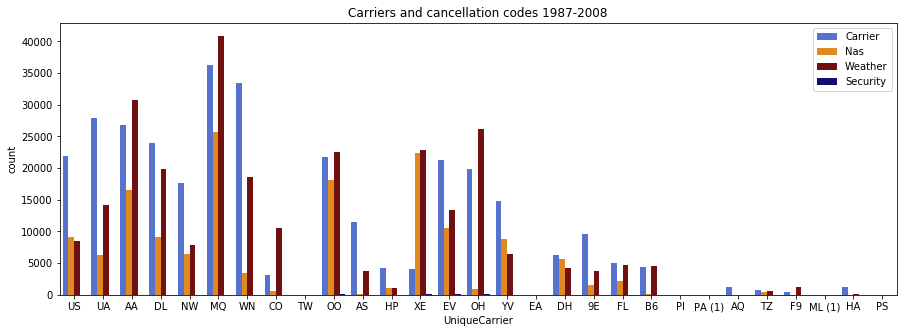

In [32]:
plt.figure(figsize = [15, 5])
sb.countplot(data = df_can, x = 'UniqueCarrier', hue = 'CancellationCode', order = df_can.UniqueCarrier.value_counts().index, palette = color_1);
plt.legend(code, loc='upper right');
plt.title('Carriers and cancellation codes 1987-2008');

### weather appers fairly often as a cancellation reason, let's have a look

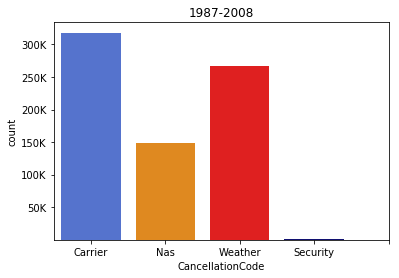

In [33]:
color_3 = [  "royalblue", "darkorange", "r", "navy"]
code = ['Carrier', 'Nas', 'Weather', 'Security']
xticks_loc = np.arange(0, 5, 1)
yticks_loc = np.arange(50000, df_can.CancellationCode.value_counts().max(), 50000)
numbers = ['50K', '100K', '150K', '200K', '250K', '300K', '350K']
sb.countplot(data = df_can, x = 'CancellationCode', palette= color_3)
plt.xticks(xticks_loc, code);
plt.yticks(yticks_loc, numbers)
plt.title('1987-2008');


### Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

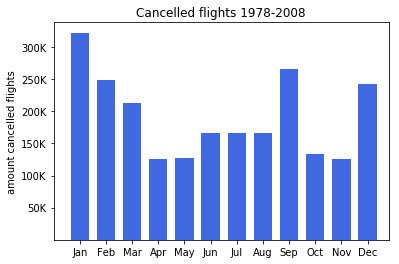

In [34]:
bins = np.arange(0.5, 12.5+1, 1)
ticks_loc = np.arange(1, 12+1, 1)
months = cd.month_abbr[1:13]

yticks_loc = np.arange(50000, df_can.Month.value_counts().max(), 50000)
numbers = ['50K', '100K', '150K', '200K', '250K', '300K', '350K']

plt.hist(data = df_can, x = 'Month', bins  = bins, rwidth = 0.7, color = base_color_1);
plt.xlim([0, 12.8]);
plt.xticks(ticks_loc, months );
plt.yticks(yticks_loc, numbers)
plt.ylabel('amount cancelled flights');
plt.title('Cancelled flights 1978-2008');

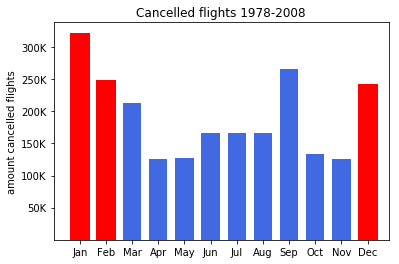

In [35]:
bins = np.arange(0.5, 12.5+1, 1)
ticks_loc = np.arange(1, 12+1, 1)
months = cd.month_abbr[1:13]

yticks_loc = np.arange(50000, df_can.Month.value_counts().max(), 50000)
numbers = ['50K', '100K', '150K', '200K', '250K', '300K', '350K']

fig, ax = plt.subplots();
plt.hist(data = df_can, x = 'Month', bins  = bins, rwidth = 0.7, color = base_color_1);
ax.vlines(1, ymin = 0, ymax =df_can.query('Month == "1"').shape[0],  linewidth=20, color='r')
ax.vlines(2, ymin = 0, ymax =df_can.query('Month == "2"').shape[0],  linewidth=20, color='r')
ax.vlines(12, ymin = 0, ymax =df_can.query('Month == "12"').shape[0],  linewidth=20, color='r')

plt.xlim([0, 12.8]);
plt.xticks(ticks_loc, months );
plt.yticks(yticks_loc, numbers)
plt.ylabel('amount cancelled flights');
plt.title('Cancelled flights 1978-2008');

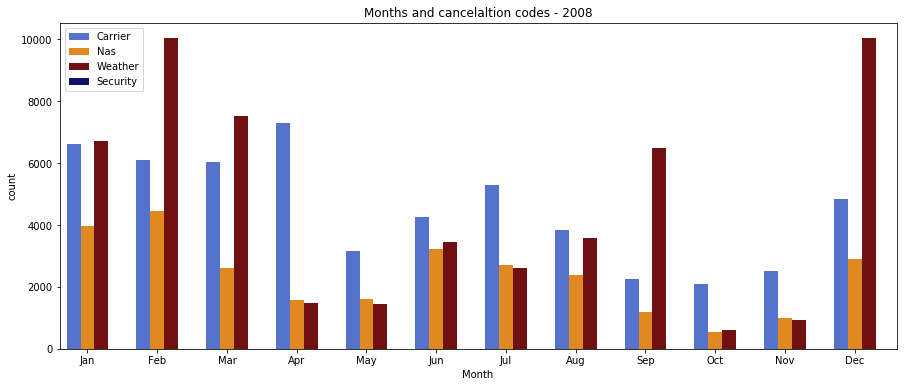

In [36]:
plt.figure(figsize = [15, 6])
#bins = np.arange(0.5, 12.5+1, 1)
ticks_loc = np.arange(-0.1, 11.9, 1)
months = cd.month_abbr[1:13]
sb.countplot(data = cancel_2, x = 'Month', hue = 'CancellationCode', palette = color_1);
code = ['Carrier', 'Nas', 'Weather', 'Security']
plt.xticks(ticks_loc, months)
plt.legend(code, loc='best');
plt.title('Months and cancelaltion codes - 2008');

### choose the right season!

### and what about the airport?

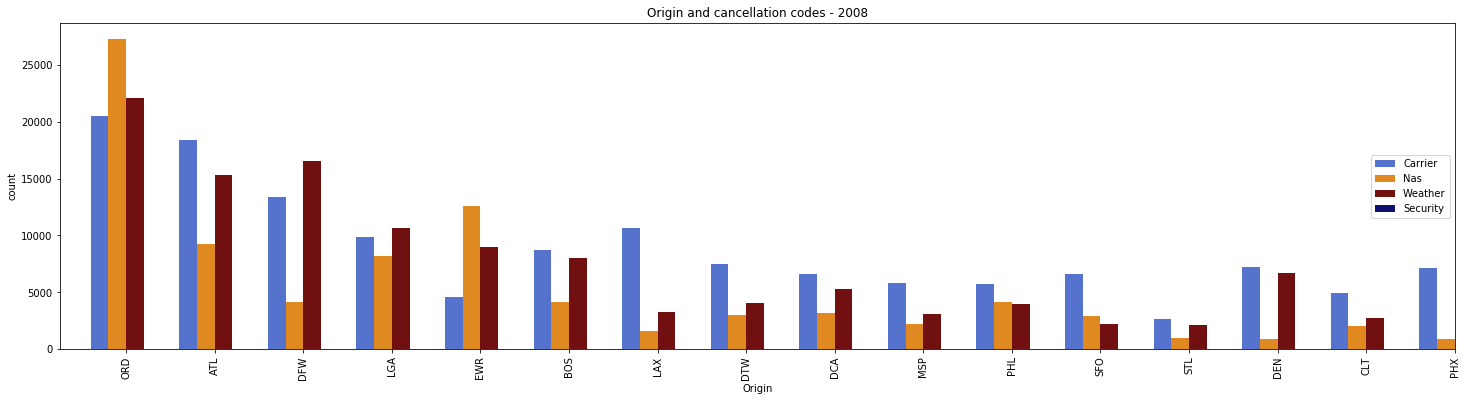

In [37]:
plt.figure(figsize = [25, 6])
sb.countplot(data = df_can, x = 'Origin', hue = 'CancellationCode', order = df_can.Origin.value_counts().index, palette = color_1);
code = ['Carrier', 'Nas', 'Weather', 'Security']
plt.xticks(rotation = 90)
plt.legend(code, loc='center right');
plt.title('Origin and cancellation codes - 2008');
plt.xlim([-0.75,15]);

### let's look at the third most common cancellation code

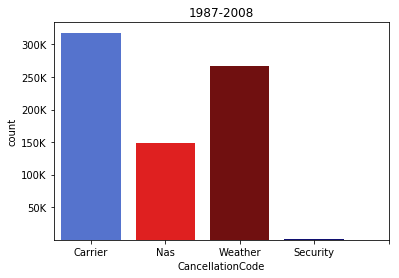

In [38]:
color_4 = [ "royalblue", "r", "maroon", "navy"]
code = ['Carrier', 'Nas', 'Weather', 'Security']
xticks_loc = np.arange(0, 5, 1)
yticks_loc = np.arange(50000, df_can.CancellationCode.value_counts().max(), 50000)
numbers = ['50K', '100K', '150K', '200K', '250K', '300K', '350K']
sb.countplot(data = df_can, x = 'CancellationCode', palette= color_4)
plt.xticks(xticks_loc, code);
plt.yticks(yticks_loc, numbers)
plt.title('1987-2008');

### NAS - delay that is within the control of the National Airspace System 

#### may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.

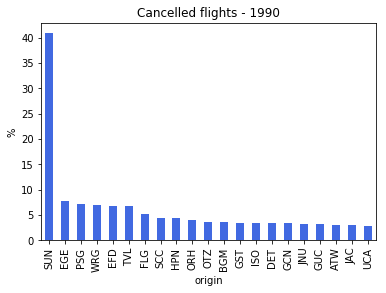

In [39]:
cancelled_per_o = cancel_1.Origin.value_counts()/sample_1.Origin.value_counts()*100
           
cancelled_per_o.sort_values(ascending=False).plot(kind = 'bar', color = base_color_1);
plt.xlim([-0.5, 20.5]); #as there are many origins we will only look at the origins with higher percentage
plt.title('Cancelled flights - 1990')
plt.ylabel('%')
plt.xlabel('origin');


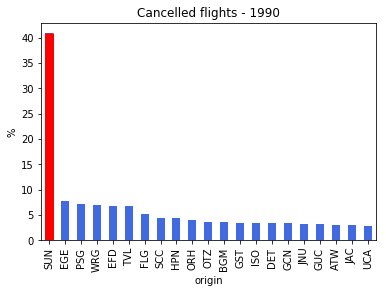

In [40]:
cancelled_per_o = cancel_1.Origin.value_counts()/sample_1.Origin.value_counts()*100
        
fig, ax = plt.subplots();    
cancelled_per_o.sort_values(ascending=False).plot(kind = 'bar', color = base_color_1);
ax.vlines(0, ymin = 0, ymax =cancelled_per_o.sort_values(ascending = False)[0],  linewidth=9, color='r')
plt.xlim([-0.5, 20.5]); #as there are many origins we will only look at the origins with higher percentage
plt.title('Cancelled flights - 1990')
plt.ylabel('%')
plt.xlabel('origin');


In [41]:
print('Total amount of flights from Friedman Memorial airport (SUN) in 1990: ', sample_1.query('Origin == "SUN"').Origin.value_counts()[0], sep='')

print('Cancelled flights from Friedman Memorial airport (SUN) in 1900: ', cancel_1.query('Origin == "SUN"').Origin.value_counts()[0], '(',round(cancelled_per_o.SUN, 1), '%' , ')',  sep='')
            
            

Total amount of flights from Friedman Memorial airport (SUN) in 1990: 66
Cancelled flights from Friedman Memorial airport (SUN) in 1900: 27(40.9%)


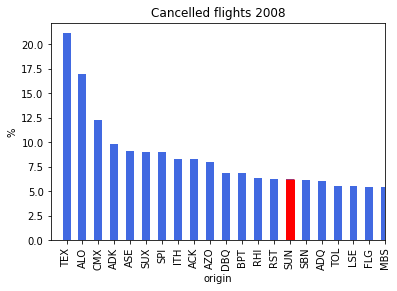

In [42]:
cancelled_per_o2 = cancel_2.Origin.value_counts()/sample_2.Origin.value_counts()*100

fig, ax = plt.subplots(); 
cancelled_per_o2.sort_values(ascending=False).plot(kind = 'bar', color = base_color_1);
ax.vlines(14, ymin = 0, ymax =cancelled_per_o2.sort_values(ascending = False)[14],  linewidth=9, color='r')
plt.xlim([-1, 20]);
plt.title('Cancelled flights 2008')
plt.ylabel('%')
plt.xlabel('origin');

In [44]:

print('Total amount of flights from Friedman Memorial airport (SUN) in 2008: ', sample_2.query('Origin == "SUN"').Origin.value_counts()[0],  sep='')
print('Cancelled flights from Friedman Memorial airport (SUN) in 2008: ', cancel_2.query('Origin == "SUN"').Origin.value_counts()[0], '(', round(cancelled_per_o2.SUN, 1),'%', ')',  sep='' )
            

Total amount of flights from Friedman Memorial airport (SUN) in 2008: 2871
Cancelled flights from Friedman Memorial airport (SUN) in 2008: 179(6.2%)


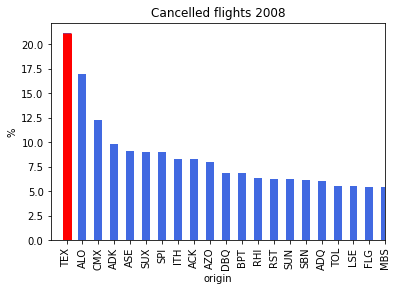

In [45]:
cancelled_per_o2 = cancel_2.Origin.value_counts()/sample_2.Origin.value_counts()*100

fig, ax = plt.subplots(); 
cancelled_per_o2.sort_values(ascending=False).plot(kind = 'bar', color = base_color_1);
ax.vlines(0, ymin = 0, ymax =cancelled_per_o2.sort_values(ascending = False)[0],  linewidth=9, color='r')
plt.xlim([-1, 20]);
plt.title('Cancelled flights 2008')
plt.ylabel('%')
plt.xlabel('origin');

In [47]:
print('Total amount of flights from Telluride Regional airport (TEX) in 1990: 0')
print('Total amount of flights from Telluride Regional airport (TEX) in 2008: ', sample_2.query('Origin == "TEX"').Origin.value_counts()[0],  sep='')
print('Cancelled flights from Telluride Regional airport (TEX) in 2008: ', cancel_2.query('Origin == "TEX"').Origin.value_counts()[0], '(', round(cancelled_per_o2.TEX, 1),'%', ')',  sep='')
            

Total amount of flights from Telluride Regional airport (TEX) in 1990: 0
Total amount of flights from Telluride Regional airport (TEX) in 2008: 194
Cancelled flights from Telluride Regional airport (TEX) in 2008: 41(21.1%)


##### if we plot percentage of cancelled flights, we can see that SUN is on the leading position with more that 40% cancellation in 1990, and in 2008 it's TEX which is on the firts place.                                                                                           
##### if to pay attention to the fact that none of those origins appear in the first 20 origins, one would wonder how can this happend. and it actually can because it is the procentage and thus small total amount of flights can lead to higher percentage of cancellation. so general conclusion that the size of the airport might affect amount of cancelled flights


In [48]:
#get additional information - total amount of flights per carrier for 1987-2008
or_list_1 = list(df_origin.origin.unique())
or_list_2 = list(df_can.Origin.unique())
match_o = list(set(or_list_1)&set(or_list_2))

amount_flights_2 = []
for origin in or_list_1:
    amount_flights_2.append(df_origin.query('origin == @origin').amount.sum())
    
new_df_2 = pd.DataFrame({'origin': or_list_1, 'total_flights':amount_flights_2})  

In [49]:
new_df_or = new_df_2[new_df_2['origin'].isin(match_o)]

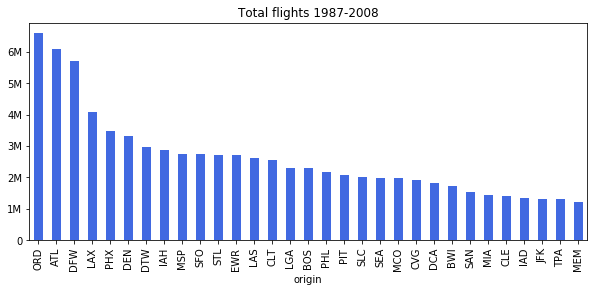

In [50]:
fig, ax = plt.subplots(figsize = [10,4]);
yticks_loc = np.arange(0, new_df_or.total_flights.max(), 1e6)
numbers = ['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M']
order = list(new_df_or.sort_values("total_flights", ascending = False).origin)
xticks_loc = np.arange(0, len(match_o), 1)
new_df_or.total_flights.sort_values(ascending = False).plot(kind = 'bar', color = base_color_1);
plt.yticks(yticks_loc, numbers)
plt.xticks(xticks_loc, order)
plt.xlim([-0.5,30.5])
plt.xlabel('origin')
plt.title('Total flights 1987-2008');

In [51]:
new_index = list(new_df_or.origin)
num = df_can.Origin.value_counts()
num = num.reindex(index = new_index) 
new_df_or['percent'] = np.array(num)/new_df_or.total_flights*100

/Users/tatis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [52]:
#drop origins with less than 5 flights a year as an outlier
new_df_or = new_df_or.drop(new_df_or[new_df_or.total_flights < 5].index)

In [53]:

#filtering the airports with less than 1500 and more than 50000 flight per year:
many_flight_or = new_df_or.drop(new_df_or[new_df_or.total_flights > 50000].index)
few_flights_or = new_df_or.drop(new_df_or[new_df_or.total_flights > 1500].index)



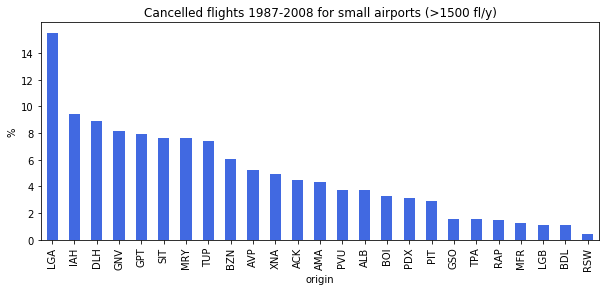

In [54]:
yticks_loc = np.arange(0, few_flights_or.percent.max(),2)
xticks_loc = np.arange(0, few_flights_or.shape[0], 1)
fig, ax = plt.subplots(figsize = [10,4]);
few_flights_or.percent.sort_values(ascending = False).plot(kind = 'bar', color = base_color_1);
plt.xticks(xticks_loc, match_o)
plt.yticks(yticks_loc)
plt.ylabel('%')
plt.xlabel('origin')
#plt.xlim([-0.7,30.5])
plt.title('Cancelled flights 1987-2008 for small airports (>1500 fl/y)');

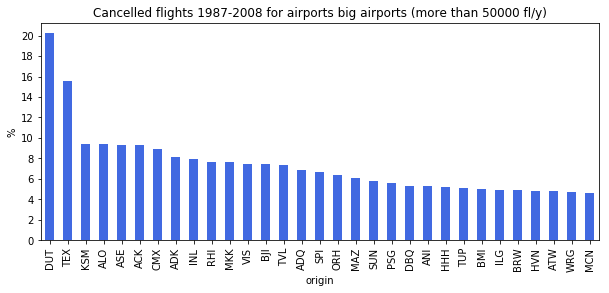

In [55]:
yticks_loc = np.arange(0, many_flight_or.percent.max(),2)
xticks_loc = np.arange(0, many_flight_or.origin.nunique(), 1)
xticks = list(many_flight_or.sort_values('percent', ascending = False).origin)
fig, ax = plt.subplots(figsize = [10,4]);
many_flight_or.percent.sort_values(ascending = False).plot(kind = 'bar', color = base_color_1);
plt.xticks(xticks_loc, xticks)
plt.yticks(yticks_loc)
plt.ylabel('%')
plt.xlabel('origin')
plt.xlim([-0.5,30.5]) #30 first of airports from the list of airport with high amount of flights
plt.title('Cancelled flights 1987-2008 for airports big airports (more than 50000 fl/y)');

In [59]:
amount_3 = df_can['Origin'].value_counts()
condition = amount_3 <1500
mask_3 = amount_3[condition].index

per_cancelled = cancelled_per_o.sort_values()
condition = per_cancelled>1.5
mask_3a = per_cancelled[condition].index

match_3 = len(list(set(mask_3)&set(mask_3a)))

In [60]:
print('amount of origins with less than 1500 flights per year in 1987-2008:', len(mask_3))
print('amount of origins with more than 1.5% cancelled flight in 1987-2008:', len(mask_3a))
print('amount matching origins: ', match_3, ' airports(', round(match_3/len(mask_3)*100), '%)', sep = '')

amount of origins with less than 1500 flights per year in 1987-2008: 193
amount of origins with more than 1.5% cancelled flight in 1987-2008: 76
amount matching origins: 45 airports(23%)


In [62]:
amount_4 = df_can['Origin'].value_counts()
condition = amount_4 >50000  
mask_4 = amount_4[condition].index

per_cancelled = cancelled_per_o.sort_values()
condition = per_cancelled<1.5
mask_4a = per_cancelled[condition].index

match_4 = len(set(mask_4)&set(mask_4a))

In [63]:
print('amount of origins with more than 50000 flights per year in 1987-2008:', len(mask_4))
print('amount of origins with less than 1.5% cancelled flight in 1987-2008:', len(mask_4a))
print('amount matching origins: ', match_4, ' airports(', round(match_4/len(mask_4)*100), '%)', sep = '')

amount of origins with more than 50000 flights per year in 1987-2008: 12
amount of origins with less than 1.5% cancelled flight in 1987-2008: 153
amount matching origins: 9 airports(75%)


### choose bigger airport!

### last but not least 


In [64]:
mean = df_can.DayOfWeek.value_counts().mean()
sat = df_can.query('DayOfWeek == "6"').DayOfWeek.value_counts().mean()
sun = df_can.query('DayOfWeek == "7"').DayOfWeek.value_counts().mean()

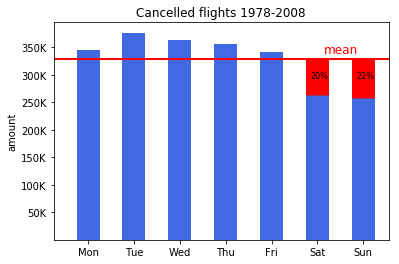

In [65]:
y = df_can.DayOfWeek.value_counts().mean()

bins = np.arange(0, 8, 0.5)

xticks_loc = np.arange(1.25, 8.5, 1)
weekday = cd.day_abbr[0:8]

yticks_loc = np.arange(50000, df_can.DayOfWeek.value_counts().max(), 50000)
numbers = ['50K', '100K', '150K', '200K', '250K', '300K', '350K']

fig, ax = plt.subplots()

plt.hist(data = df_can, x = 'DayOfWeek', bins  = bins, color = base_color_1);
plt.xticks(xticks_loc, weekday);
plt.xlim(0.5, 7.8)

ax.hlines(y, xmin=0.5, xmax=8, linewidth=2, color='r')
ax.vlines(6.25, ymin = sat, ymax = mean, linewidth=23, color='r')
ax.vlines(7.25, ymin = sun, ymax = mean, linewidth=23, color='r')

plt.text(6.4,y+10e3, "mean", fontsize = 12, color='r')
plt.text(6.1,mean - 35000, "20%", fontsize = 8, color='k')
plt.text(7.1,mean - 35000, "22%", fontsize = 8, color='k')

plt.yticks(yticks_loc, numbers)
plt.ylabel('amount');

plt.title('Cancelled flights 1978-2008');


### buy tickets to fly on weekend :D 